# Obfuscating Client Data without Reducing Machine Learning Quality

### Table of Contents
* [Obfuscating Client Data without Reducing Machine Learning Quality](https://colab.research.google.com/drive/1-g48wg67Fdr8gt5jaL5BJI2WoIhX67LQ#scrollTo=8D8XSqX9S3e_&line=1&uniqifier=1)    
    * [Linear Algebra](#scrollTo=h_FhWUmJRLg7)
    * [Pre-processing & Data Exploration](#scrollTo=bNjkJLrmRLg_)
    * [1. Initialization](#scrollTo=bNjkJLrmRLg_)
        * [1.1. Load Data](#scrollTo=T5xSt0DURLhD)
        * [1.2. Rename the Columns](#scrollTo=SyvS1nTiRLhF)
        * [1.3. Print the Sample of Data](#scrollTo=_PdZ0AGCRLhG)
        * [1.4. Get the Information of the Data](#scrollTo=MIXDqnXeRLhJ)
    * [2. Improve Data Quality and EDA](#scrollTo=YO2nlwBvRLhN)
        * [2.1. Checking Missing Value and Duplicate](#scrollTo=ALkn3qPERLhN)
        * [2.2. EDA](#scrollTo=hLix6ZwhRLhS)
    * [3. Purpose of Project](#scrollTo=ZRczraZ0RLhW)
        * [3.1. Objective 1. Similar Clients](#scrollTo=h7qNw4JQRLhX)
            * [3.1.1. Data Scaling](#scrollTo=AIQHfQLIRLhZ)
            * [3.1.2. Model without Scale](#scrollTo=yeMywOyERLha)
            * [3.1.3. Models with Scale](#scrollTo=7ROsTAAaRLhb)
        * [3.2. Objective 2. Is the Client Likely to Receive Insurance Benefits?](#scrollTo=R1OKSvuuRLhd)
            * [3.2.1. Create Dummy Model](#scrollTo=0vpSzoSgRLhg)
            * [3.2.2. Create Models with Actual Data and Scaled Data](#scrollTo=mjEtRPucRLhi)
        * [3.3. Objective 3. Regression (with Linear Regression)](#scrollTo=HmLFyOv9RLhk)
        * [3.4. Objective 4. Data Obfuscation](#scrollTo=jFUvZpR6RLh2)
        * [3.5. Prove that data obfuscation can work with LR](#scrollTo=hduy1-1wRLiB)
        * [3.6 Test Linear Regression With Data Obfuscation](#scrollTo=KZNVOJXDRLiG)
    * [4. Conclusion](#scrollTo=l69OGvgaRLiK)



## Linear Algebra

An insurance company called "Sure Tomorrow" wants to solve some problems with the help of machine learning. You are asked to evaluate the possibility.

**Goals:**

- Task 1: Find clients who are similar to specific client criteria. This task will make it easier for the company to do marketing.
- Task 2: Predict whether new clients will likely get insurance benefits. Is the model's prediction better than the *dummy* model?
- Task 3: Predict the amount of insurance benefits a new client will likely receive using a linear regression model.
- Task 4: Protect the client's data without breaking the model from the previous task. It is essential to develop data transformation algorithms that can prevent the misuse of personal information if the data falls into the wrong hands. It is called data hiding or data obfuscation. However, the data protection procedure also needs to be considered so that the quality of the machine learning model does not decrease. You don't need to choose the best model. Just prove that the algorithm works accurately.

## Pre-processing & Data Exploration

## 1. Initialization

In [1]:
# load all libraries
import numpy as np
import pandas as pd
import random, math, itertools
import warnings
warnings.filterwarnings('ignore')
from collections import defaultdict

import seaborn as sns
import matplotlib.pyplot as plt

import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
import sklearn.preprocessing

from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from IPython.display import display

### 1.1. Load Data

Load the data and perform checks to ensure it is free of problems.

In [2]:
# Load Data
df = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/insurance_us.csv')

### 1.2. Rename the Columns

Rename the columns to make the code look more consistent.

In [3]:
# rename the columns
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

### 1.3. Print the Sample of Data

In [4]:
# print the sample of data
df.head(10)

,gender,age,income,family_members,insurance_benefits
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
5,1,43.0,41000.0,2,1
6,1,39.0,39700.0,2,0
7,1,25.0,38600.0,4,0
8,1,36.0,49700.0,1,0
9,1,32.0,51700.0,1,0


### 1.4. Get the Information of the Data

In [5]:
# get the information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [6]:
# we will change the age type (from float to int) even though it is not too important to do sodf['age'] = df['age'].apply(np.int64)
df['age'].dtype

dtype('float64')

In [7]:
# check if the conversion was successful
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


We have changed the data type of the `age` column from `float` to `integer`. Now we will proceed to observe the descriptive statistics of the data.

In [8]:
# observed descriptive statistics of the data
df.describe()

,gender,age,income,family_members,insurance_benefits
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


**Findings:**
- There is no dominating `gender` group of our insurance clients as they are equal in number.
- We can conclude that the type of insurance in this data is not a family insurance type because, based on the age in the data, there are no clients below the age of **18**, with a maximum age of **65**.
- The average income of insurance clients is around **40,000**.

## 2. Improve Data Quality and EDA

### 2.1. Checking Missing Value and Duplicate

In [9]:
# checking missing value
df.isna().sum()

gender                0
age                   0
income                0
family_members        0
insurance_benefits    0
dtype: int64

In [10]:
# checking duplicate
df.duplicated().sum()

153

In [11]:
# show the duplicates data
df[df.duplicated()].head()

,gender,age,income,family_members,insurance_benefits
281,1,39.0,48100.0,1,0
488,1,24.0,32900.0,1,0
513,0,31.0,37400.0,2,0
718,1,22.0,32600.0,1,0
785,0,20.0,35800.0,0,0


In [12]:
# show the sample od duplicates value
df[df['income'] == 48100.0].head()

,gender,age,income,family_members,insurance_benefits
69,1,39.0,48100.0,1,0
281,1,39.0,48100.0,1,0
434,1,32.0,48100.0,2,0
717,1,27.0,48100.0,3,0
906,0,27.0,48100.0,0,0


- The row **69** has an identical value to the row **281**. 
- We will drop the duplicate data.

In [13]:
# drop the duplicates
df = df.drop_duplicates().reset_index(drop=True)

# calculating data dimensions
df.shape

(4847, 5)

- We have removed the duplicate data.

### 2.2. EDA

Whether there is a specific client group by observing a pair of plots.

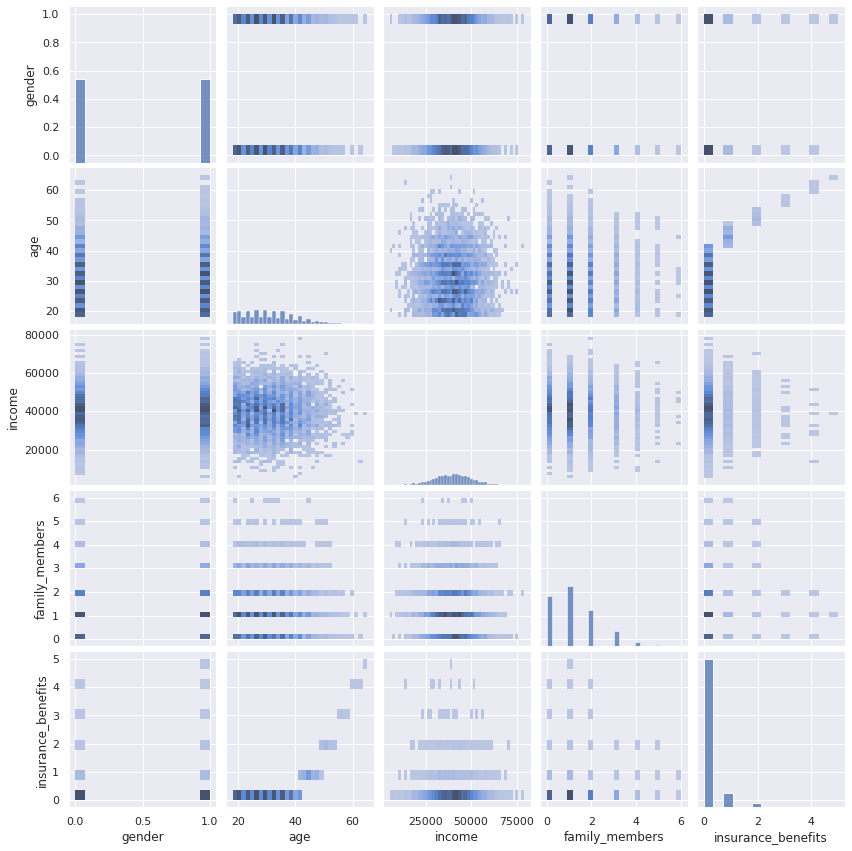

In [14]:
# display the distribution of dataset
sns.set()

g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

It may be challenging to detect clusters clearly because combining multiple variables (to analyze multivariate distributions) is difficult. However, that's what LA and ML are here.

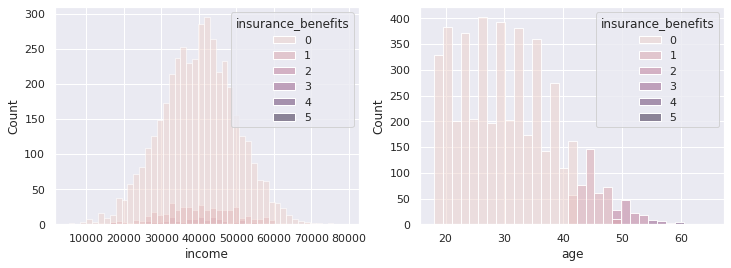

In [15]:
# showing income and age distribution

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(x=df['income'], hue=df['insurance_benefits'], ax=ax[0])
sns.histplot(x=df['age'], hue=df['insurance_benefits'], ax=ax[1])
plt.show()

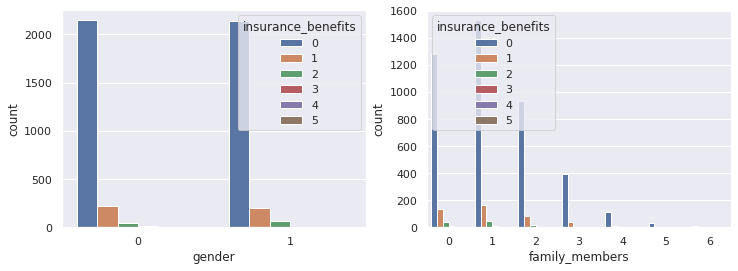

In [16]:
# displays the distribution of gender and family members
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.countplot(x=df['gender'], hue=df['insurance_benefits'], ax=ax[0])
sns.countplot(x=df['family_members'], hue=df['insurance_benefits'], ax=ax[1])
plt.show()

**Findings:**
- We can see that the income distribution of insurance users has a normal distribution with an average income of **40,000**.
- There are no young clients who benefit from insurance. All clients who receive insurance are above the age of **40**.

## 3. Purpose of Project

### 3.1. Objective 1. Similar Clients

**(Customers with Similar Characteristics)**

In ML programming languages, it is essential to develop procedures to determine the k nearest *neighbors* (objects) to a given object based on the distance to the object.

We can use the groundwork below to create a model
- Distance Between Vectors -> Euclidean Distance
- Distance Between Vectors -> Manhattan Distance

To solve this, we will try some metrics.

Create a function that displays the k nearest *neighbors* for the $n^{th}$th object based on a given distance metric. The amount of insurance benefits received is not considered for this purpose, nor do we include the `insurance_benefits` field in the prediction.

Using the kNN algorithm implementation available in scikit-learn (we can see from the source [link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors)) or determining the optimal *hyperparameters*.

Test for four combinations of two cases
- Scaling
  - the data is not scaled
  - scale the data with [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html) 
- Distance Metric
  - Euclidean
  - Manhattan

Answer the following questions:
- Does unscaled data affect the kNN algorithm? If it does, then what form does it take?
- How similar are the results obtained from the Euclidean metric when using the Manhattan distance metric (regardless of scaling)?

In [17]:
# define the feature set
feature_names = ['gender', 'age', 'income', 'family_members']

In [18]:
def get_knn(df, n, k, metric):
    
    """
    Display the k nearest neighbors

    :param df: pandas DataFrame used to find similar objects
    :param n: number of objects to find nearest *neighbors* for
    :param k: number of nearest *neighbors* displayed
    :param metric: distance metric name
    """

    nbrs = NearestNeighbors(n_neighbors=k, metric=metric).fit(df[feature_names]) # unsupervised model
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], k, return_distance=True) # return the indices and distance
    
    df_res = pd.concat([
        df.iloc[nbrs_indices[0]], 
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
        ], axis=1)
    
    return df_res

#### 3.1.1. Data Scaling

Set the scale of the data.

In [19]:
# data scalling

transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

In [20]:
# show the sample of data scaled
df_scaled.head()

,gender,age,income,family_members,insurance_benefits
0,1.0,0.630769,0.627848,0.166667,0
1,0.0,0.707692,0.481013,0.166667,1
2,0.0,0.446154,0.265823,0.000000,0
3,0.0,0.323077,0.527848,0.333333,0
4,1.0,0.430769,0.330380,0.000000,0


Get similar notes for each combination

#### 3.1.2. Model without Scale

In [21]:
# show the model results from the data without scaling
for i in ['euclidean', 'manhattan']:
    df_knn_act = get_knn(df, 5, 5, i)
    display(f'metric = {i}', df_knn_act)
    print()

'metric = euclidean'

,gender,age,income,family_members,insurance_benefits,distance
5,1,43.0,41000.0,2,1,0.000000
1965,0,45.0,41000.0,0,1,3.000000
3860,1,40.0,41000.0,1,0,3.162278
4617,1,46.0,41000.0,1,1,3.162278
3695,0,46.0,41000.0,2,1,3.162278


'metric = manhattan'

,gender,age,income,family_members,insurance_benefits,distance
5,1,43.0,41000.0,2,1,0.0
3860,1,40.0,41000.0,1,0,4.0
3695,0,46.0,41000.0,2,1,4.0
4617,1,46.0,41000.0,1,1,4.0
1965,0,45.0,41000.0,0,1,5.0


#### 3.1.3. Models with Scale

In [22]:
# show the model results from the data with scaling
for i in ['euclidean', 'manhattan']:
    df_knn = get_knn(df_scaled, 5, 5, i)
    df_knn_compare = pd.concat([df.loc[df_knn.index], df_knn], axis=1, keys=['actual', 'scaled'])
    display(f'metric = {i}', df_knn_compare)
    print()

'metric = euclidean'

actual                                                  scaled            \
     gender   age   income family_members insurance_benefits gender       age   
5         1  43.0  41000.0              2                  1    1.0  0.661538   
1136      1  42.0  40800.0              2                  0    1.0  0.646154   
3955      1  43.0  39600.0              2                  1    1.0  0.661538   
1011      1  42.0  39600.0              2                  0    1.0  0.646154   
2897      1  41.0  41100.0              2                  0    1.0  0.630769   

                                                            
        income family_members insurance_benefits  distance  
5     0.518987       0.333333                  1  0.000000  
1136  0.516456       0.333333                  0  0.015592  
3955  0.501266       0.333333                  1  0.017722  
1011  0.501266       0.333333                  0  0.023468  
2897  0.520253       0.333333                  0  0.030795

'metric = manhattan'

actual                                                  scaled            \
     gender   age   income family_members insurance_benefits gender       age   
5         1  43.0  41000.0              2                  1    1.0  0.661538   
3955      1  43.0  39600.0              2                  1    1.0  0.661538   
1136      1  42.0  40800.0              2                  0    1.0  0.646154   
2897      1  41.0  41100.0              2                  0    1.0  0.630769   
1011      1  42.0  39600.0              2                  0    1.0  0.646154   

                                                            
        income family_members insurance_benefits  distance  
5     0.518987       0.333333                  1  0.000000  
3955  0.501266       0.333333                  1  0.017722  
1136  0.516456       0.333333                  0  0.017916  
2897  0.520253       0.333333                  0  0.032035  
1011  0.501266       0.333333                  0  0.033106

Answer the question

**Does unscaled data affect the kNN algorithm? If it does, then what form does it take?** 

- Of course, scaling does affect the algorithm. The model tends to consider data with a very high *value* more important than a small *value*, for example, comparing `income`, which can have numbers up to **tens of thousands** compared to `age`, which has several **tens** only, especially when compared to `family_members` which has a maximum number of **6**. The model will likely ignore the data in the `age` and `family_members` columns.
- Data that is not scaled has a more significant distance than mounted data.

**How similar are the results obtained from the Euclidean metric when using the Manhattan distance metric (regardless of scaling)?**

- The `Euclidian metric` and the `Manhattan metric` have similar results, although not precisely identical. The `Euclidian metric` tends to have a smaller distance than the `Manhattan metric` due to the nature of the difference being only about **0.01**.

### 3.2. Objective 2. Is the Client Likely to Receive Insurance Benefits?

In the context of machine learning, this task is similar to the binary classification task.

With a target `insurance_benefits` greater than zero, evaluate whether the kNN classification model is a better approach than the *dummy* model.

Instructions:
- Build a KNN-based classifier and measure its quality with the F1 metric for k=1..10 for the original and scaled data. It will be interesting to see how k can affect the evaluation metric and whether scaling the data makes the results different. Use the implementation of the kNN classification algorithm available on scikit-learn (check [link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) or your own.
- Create a random *dummy* model for this case. The model should output **1** with some probability. Test the model with four probability values: 0, the probability of paying any insurance benefit; 0.5; 1.

The probability of paying insurance benefits can be defined as

$$
P\{\text{insurance benefits received}\}=\frac{\text{number of clients receiving insurance benefits}}{\text{total number of clients}}.
$$

Split the overall data into 70:30 for the proportion of **training** and **test set**.

In [23]:
# calculate the target
df['insurance_benefits_received'] = (df['insurance_benefits'] != 0).astype('int')

df.sample(5)

,gender,age,income,family_members,insurance_benefits,insurance_benefits_received
3214,1,30.0,40800.0,0,0,0
1963,0,23.0,31200.0,1,0,0
3415,1,32.0,25200.0,1,0,0
2791,0,21.0,37200.0,0,0,0
3726,1,29.0,32900.0,2,0,0


Number of clients receiving insurance benefits
0    4284
1     563
Name: insurance_benefits_received, dtype: int64

Comparison of clients receiving insurance benefits
0    88.384568
1    11.615432
Name: insurance_benefits_received, dtype: float64


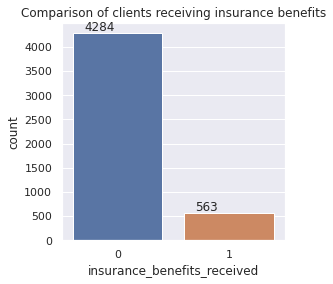

In [24]:
# check class imbalance with value_counts()
print(f'Number of clients receiving insurance benefits')
print(df['insurance_benefits_received'].value_counts()), print()

print(f'Comparison of clients receiving insurance benefits')
print(df['insurance_benefits_received'].value_counts() / len(df) * 100)

# display plot
fig, ax = plt.subplots(figsize=(4, 4))
ax = sns.countplot(df['insurance_benefits_received'])
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
plt.title('Comparison of clients receiving insurance benefits')
plt.show()

- The number of *customers* who **do not** use insurance benefits is **4436** with a percentage of **89%** compared to **11%** of *customers* who use insurance benefits. If we perform model with this data, *machine learning* will tend to ignore the smaller data.
- We will perform model with the original data and the data scaled by the *upsampling* method. We will find the difference between the two.

In [25]:
# defines the evaluation metric function
def eval_classifier(y_true, y_pred):
    
    f1_score = sklearn.metrics.f1_score(y_true, y_pred) # metric evaluation f1 score
    print(f'F1: {f1_score:.2f}')
    
# we will restart the notebook if an error occurs
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print('Confusion Matrix')
    print(cm)

#### 3.2.1. Create Dummy Model

In [26]:
# collecting outputs on a randomized model

def rnd_model_predict(P, size, seed=42):

    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

In [27]:
# create dummy model
for P in [0, df['insurance_benefits_received'].sum() / len(df), 0.5, 1]:

    print(f'Probability: {P:.2f}')
    y_pred_rnd = rnd_model_predict(P, size=len(df))
        
    eval_classifier(df['insurance_benefits_received'], y_pred_rnd)
    
    print()

Probability: 0.00
F1: 0.00
Confusion Matrix
[[0.88384568 0.        ]
 [0.11615432 0.        ]]

Probability: 0.12
F1: 0.13
Confusion Matrix
[[0.78502166 0.09882401]
 [0.1017124  0.01444192]]

Probability: 0.50
F1: 0.19
Confusion Matrix
[[0.44873117 0.4351145 ]
 [0.05921188 0.05694244]]

Probability: 1.00
F1: 0.21
Confusion Matrix
[[0.         0.88384568]
 [0.         0.11615432]]



#### 3.2.2. Create Models with Actual Data and Scaled Data

In [28]:
# split features and target
features = ['age', 'gender', 'income', 'family_members']
target = ['insurance_benefits_received']

In [29]:
# model results without scaling
X = df[features].to_numpy()
y = df[target].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

for n in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)

    y_test_pred = knn.predict(X_test)
    
    print(f'n_neighbors = {n}')
    eval_classifier(y_test, y_test_pred) 
        
    print()

n_neighbors = 1
F1: 0.66
Confusion Matrix
[[0.86735395 0.02405498]
 [0.04261168 0.06597938]]

n_neighbors = 2
F1: 0.47
Confusion Matrix
[[0.88522337 0.00618557]
 [0.07353952 0.03505155]]

n_neighbors = 3
F1: 0.45
Confusion Matrix
[[0.87353952 0.01786942]
 [0.07147766 0.0371134 ]]

n_neighbors = 4
F1: 0.16
Confusion Matrix
[[0.88934708 0.00206186]
 [0.09896907 0.00962199]]

n_neighbors = 5
F1: 0.17
Confusion Matrix
[[0.88659794 0.004811  ]
 [0.09828179 0.01030928]]

n_neighbors = 6
F1: 0.08
Confusion Matrix
[[8.90721649e-01 6.87285223e-04]
 [1.03780069e-01 4.81099656e-03]]

n_neighbors = 7
F1: 0.10
Confusion Matrix
[[8.90721649e-01 6.87285223e-04]
 [1.03092784e-01 5.49828179e-03]]

n_neighbors = 8
F1: 0.02
Confusion Matrix
[[0.89140893 0.        ]
 [0.10721649 0.00137457]]

n_neighbors = 9
F1: 0.04
Confusion Matrix
[[0.89140893 0.        ]
 [0.10652921 0.00206186]]

n_neighbors = 10
F1: 0.02
Confusion Matrix
[[0.89140893 0.        ]
 [0.10721649 0.00137457]]



In [30]:
# model results with scaling
X = df_scaled[features].to_numpy()
y = df[target].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

for n in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)

    y_test_pred = knn.predict(X_test)
    
    print(f'n_neighbors = {n}')
    eval_classifier(y_test, y_test_pred) 
        
    print()

n_neighbors = 1
F1: 0.95
Confusion Matrix
[[0.88522337 0.00618557]
 [0.00549828 0.10309278]]

n_neighbors = 2
F1: 0.95
Confusion Matrix
[[0.89003436 0.00137457]
 [0.00962199 0.09896907]]

n_neighbors = 3
F1: 0.95
Confusion Matrix
[[0.88728522 0.00412371]
 [0.00687285 0.10171821]]

n_neighbors = 4
F1: 0.94
Confusion Matrix
[[0.89003436 0.00137457]
 [0.01099656 0.0975945 ]]

n_neighbors = 5
F1: 0.95
Confusion Matrix
[[0.88797251 0.00343643]
 [0.00756014 0.10103093]]

n_neighbors = 6
F1: 0.93
Confusion Matrix
[[0.88934708 0.00206186]
 [0.01168385 0.09690722]]

n_neighbors = 7
F1: 0.96
Confusion Matrix
[[0.88865979 0.00274914]
 [0.00549828 0.10309278]]

n_neighbors = 8
F1: 0.94
Confusion Matrix
[[0.89003436 0.00137457]
 [0.01099656 0.0975945 ]]

n_neighbors = 9
F1: 0.94
Confusion Matrix
[[0.88865979 0.00274914]
 [0.00893471 0.09965636]]

n_neighbors = 10
F1: 0.95
Confusion Matrix
[[8.90721649e-01 6.87285223e-04]
 [1.03092784e-02 9.82817869e-02]]



- The results obtained from the **KNN** model with *scaling* data and data without scaling have significant differences.
- Data with scaling performs much better in predicting the target of *customers* who do not receive insurance benefits.

### 3.3. Objective 3. Regression (with Linear Regression)

With `insurance_benefit` as the target, we will try to evaluate what the RMSE is for the linear regression model.

Creating an LR implementation. Determine how the linear regression task solution is formulated in LA terms. We will check the RMSE for both the original data and the scaled data. Can we see the difference in RMSE in these two cases?

Deskripsi
- $X$ — feature matrix, one row represents one case, each column is a feature, the first column consists of unity
- $y$ — target (vector)
- $\hat{y}$ — target estimate (vector)
- $w$ — weight vector

The matrix for linear regression can be formulated as

$$
y = Xw
$$

Training objective to find $w$ that will minimize the distance L2 (MSE) between $Xw$ and $y$:

$$
\min_w d_2(Xw, y) \quad \text{atau} \quad \min_w \text{MSE}(Xw, y)
$$

There is an analytical solution to the above:

$$
w = (X^T X)^{-1} X^T y
$$

The above formula can be used to find the weight $w$ and finally it can be used to calculate the predicted value

$$
\hat{y} = X_{val}w
$$

Split the whole data into **training** and **validation set** with the proportion of 70:30. We use the RMSE metric for model evaluation.

In [31]:
# defines the linear regression function
class MyLinearRegression:
    
    def __init__(self):
        
        self.weights = None
    
    def fit(self, X, y):
        
        # menambahkan satuan
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        self.weights = np.linalg.inv(X2.T @ X2) @ X2.T @ y

    def predict(self, X):
        
        # menambahkan satuan
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        y_pred = X2 @ self.weights
        
        return y_pred

In [32]:
# create an evaluation metric function
def eval_regressor(y_true, y_pred):
    
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')
    
    r2_score = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    print(f'R2: {r2_score:.2f}')    

In [33]:
# rmse and r2 score results without data scalling
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-9.77366729e-01  3.58042291e-02  1.95594888e-02  5.85336165e-07
 -1.21618420e-02]
RMSE: 0.36
R2: 0.66


In [34]:
# rmse and r2 score results with data scalling
X = df_scaled[features].to_numpy()
y = df[target].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[[-0.6698156 ]
 [ 1.62473815]
 [ 0.00440576]
 [ 0.03780298]
 [-0.05229838]]
RMSE: 0.24
R2: 0.67


### 3.4. Objective 4. Data Obfuscation

The best way to obfuscate the data is to multiply the numerical features (keep in mind that these features can be seen in the matrix $X$) with invertible matrix $P$. 

$$
X' = X \times P
$$

We will try to do that and check the results of the feature values after transforming. The invertible property is important here, so we make sure $P$ is invertible.

We might want to revisit the reference 'Matrices and Matrix Operations -> Matrix Multiplication' to remember the rules of matrix multiplication and its implementation with NumPy.

In [35]:
# filtering data for randomization
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

In [36]:
# convert dataset to numpy
X = df_pn.to_numpy()

# display sample
pd.DataFrame(X).head()

,0,1,2,3
0,1.0,41.0,49600.0,1.0
1,0.0,46.0,38000.0,1.0
2,0.0,29.0,21000.0,0.0
3,0.0,21.0,41700.0,2.0
4,1.0,28.0,26100.0,0.0


Create a random matrix $P$.

In [37]:
# generate a random  matrix
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

# display sample
pd.DataFrame(P)

,0,1,2,3
0,0.773956,0.438878,0.858598,0.697368
1,0.094177,0.975622,0.761140,0.786064
2,0.128114,0.450386,0.370798,0.926765
3,0.643865,0.822762,0.443414,0.227239


Check if matrix $P$ is invertible

In [38]:
# checking if matrix P is invertible
P_det = np.linalg.det(P)

# if a matrix's determinant is not equal to zero, it is invertible
P_det

0.24339135998015463

The result shows that the number is not equal to **0** meaning that we can invert the matrix to the original data.

In [39]:
# invert metrix
X_trans = X @ P

# display sample
pd.DataFrame(X_trans)

,0,1,2,3
0,6359.715273,22380.404676,18424.090742,46000.696690
1,4873.294065,17160.367030,14125.780761,35253.455773
2,2693.117429,9486.397744,7808.831560,19484.860631
3,5345.603937,18803.227203,15479.148373,38663.061863
4,3347.176735,11782.829283,9699.998942,24211.273378
...,...,...,...,...
4842,4577.581382,16107.740932,13259.688205,33107.974380
4843,6717.000247,23634.217067,19456.138634,48589.438841
4844,4346.223425,15289.241265,12586.162644,31433.508886
4845,4194.093242,14751.991024,12144.029306,30323.887634


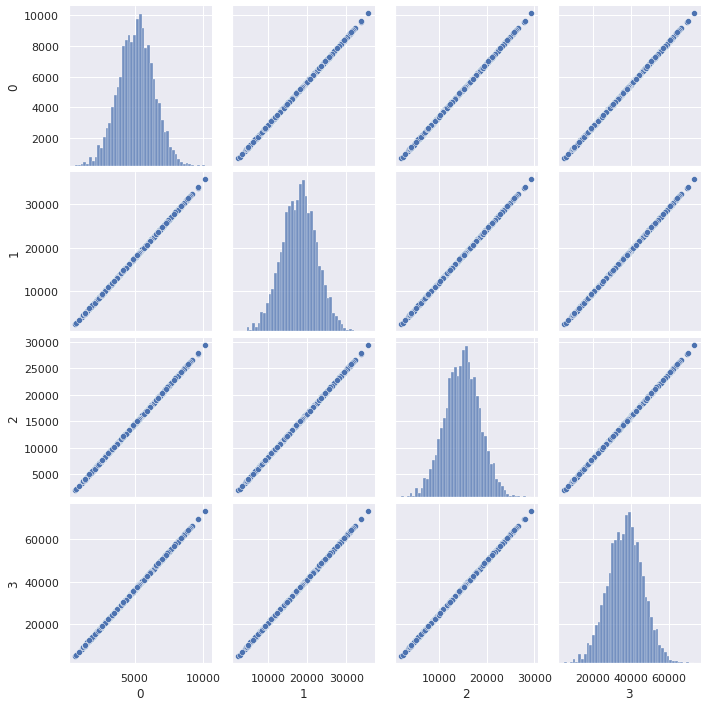

In [40]:
# display chart
sns.pairplot(pd.DataFrame(X_trans))
plt.show()

Can we guess the client's age or income after transformation?

- Transformed data does not display the distribution as in the original data, of course we cannot guess the content of the data.

In [41]:
# compare dataframes
df_obsfus = pd.DataFrame(X_trans, columns=df_pn.columns)
df_diff = pd.concat([df, df_obsfus], axis=1, keys=['ac', 'transformed'])

In [42]:
# display sample
df_diff.sample(5)

ac                                                   \
     gender   age   income family_members insurance_benefits   
2077      0  33.0  47500.0              0                  0   
517       0  28.0  42300.0              2                  0   
1017      1  29.0  43200.0              2                  0   
688       1  29.0  48300.0              3                  0   
2720      1  25.0  24700.0              1                  0   

                                  transformed                              \
     insurance_benefits_received       gender           age        income   
2077                           0  6088.505405  21425.527588  17638.023761   
517                            0  5423.131358  19080.288122  15706.955165   
1017                           0  5539.301761  19487.049967  16042.293125   
688                            0  6193.325153  21784.841012  17933.806462   
2720                           0  3168.178982  11150.184865   9179.041703   

                     
     family_members  
2077   44047.277092  
517    39224.623306  
1017   40060.195229  
688    44786.923910  
2720   22911.671439

Can you recover the original data of $X'$ if you already know the $P$? Try checking the calculation by moving $P$ from the top right side of the formula, to the left. The matrix multiplication rule comes in handy here.

In [43]:
# recovering data
P_inv = np.linalg.inv(P)

# menampilkan sample
pd.DataFrame(P_inv)

,0,1,2,3
0,0.414680,-1.437840,0.627985,1.140013
1,-1.061018,0.442193,0.132955,1.184259
2,1.423624,1.604616,-2.055382,-1.536997
3,-0.111286,-0.658138,1.749955,-0.118163


In [44]:
# invert metrix
X_recover = X_trans @ P_inv

# display sample
pd.DataFrame(X_recover)

,0,1,2,3
0,1.000000e+00,41.0,49600.0,1.000000e+00
1,-4.473636e-12,46.0,38000.0,1.000000e+00
2,-2.515869e-12,29.0,21000.0,9.524523e-13
3,-4.844982e-12,21.0,41700.0,2.000000e+00
4,1.000000e+00,28.0,26100.0,-1.019907e-13
...,...,...,...,...
4842,-2.559766e-12,28.0,35700.0,2.000000e+00
4843,-5.486091e-12,34.0,52400.0,1.000000e+00
4844,-1.928379e-12,20.0,33900.0,2.000000e+00
4845,1.000000e+00,22.0,32700.0,3.000000e+00


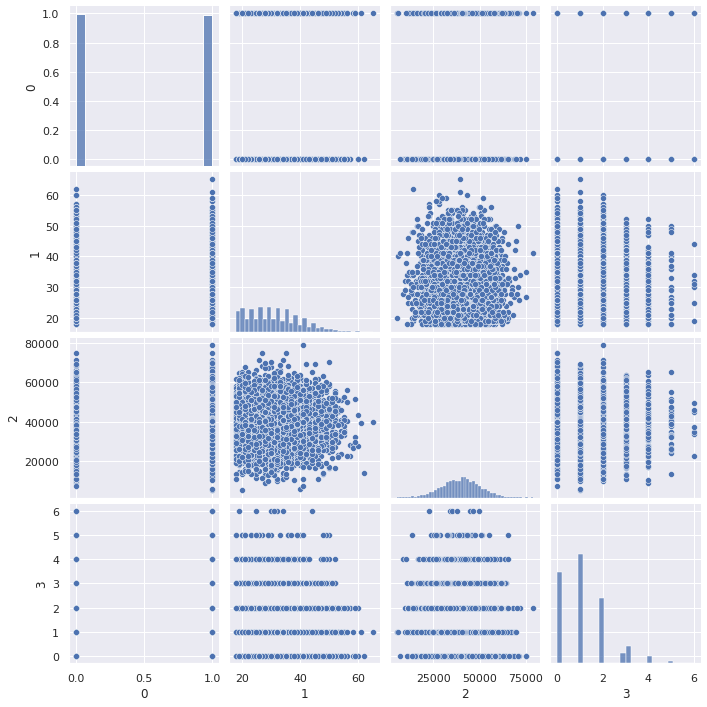

In [45]:
# display chart
sns.pairplot(pd.DataFrame(X_recover))
plt.show()

- The data has the same distribution as before but we still need to convert it into `int` form.

In [46]:
# comparing dataframes
df_recover = pd.DataFrame(X_recover, columns=df_pn.columns)
df_diverge = pd.concat([df_pn, df_obsfus, df_recover], axis=1, keys=['actual', 'transformed', 'recovered'])

Display all three cases for multiple clients 
- Original data 
- Transformed data 
- Reverted data

Maybe we will see that there are some values that are not exactly the same as the data before the transformation. Why is that?

In [47]:
# display sample
df_diverge.sample(5)

actual                                transformed                \
     gender   age   income family_members       gender           age   
2965      0  34.0  49400.0              0  6332.015484  22282.236492   
2747      1  35.0  25200.0              0  3232.533707  11384.311296   
1137      0  35.0  36100.0              0  4628.198347  16293.079140   
4630      1  18.0  38500.0              2  4936.131737  17359.504213   
3843      0  40.0  34700.0              2  4450.597878  15669.062462   

                                      recovered                                
            income family_members        gender   age   income family_members  
2965  18343.301147   45808.916636 -3.629505e-12  34.0  49400.0   3.421594e-12  
2747   9371.608698   23382.687338  1.000000e+00  35.0  25200.0   1.978123e-13  
1137  13412.448564   33483.728348 -5.234888e-12  35.0  36100.0   1.407663e-12  
4630  14291.169874   35695.753074  1.000000e+00  18.0  38500.0   2.000000e+00  
3843  12898.023857   32190.642163 -3.137747e-12  40.0  34700.0   2.000000e+00

The data is still in `numpy` form, we will convert it into `int` form.

In [48]:
# convert the dataset
df_diverge.sample(5).astype('int')

actual                           transformed                \
     gender age income family_members      gender    age income   
785       1  31  47900              1        6140  21604  17786   
2174      1  49  36300              2        4657  16398  13499   
4666      1  19  32400              0        4153  14611  12029   
3107      0  25  43200              3        5538  19483  16038   
1961      0  18  30400              1        3896  13710  11286   

                    recovered                            
     family_members    gender age income family_members  
785           44417         0  30  47899              1  
2174          33681         0  48  36300              2  
4666          30042         0  18  32400              0  
3107          40056         0  24  43199              3  
1961          28188         0  18  30399              0

The converted data shows the same result, we managed to recover the data that we **'darkened'** before.

### 3.5. Prove that data obfuscation can work with LR

The regression task has been solved with linear regression here. The next mission is to prove analytically that specific data obfuscation methods will not affect the predicted values of the linear regression, i.e., the predicted values will not change from the initial results. Are you sure? You have to prove it!

So, the data is obfuscated and there is $X \times P$ instead of just $X$ now. Consequently, there are other weights $w_P$ as
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

How would $w$ and $w_P$ be linked if you simplify the formula for $w_P$ above? 

What would be predicted values with $w_P$? 

What does that mean for the quality of linear regression if you measure it with RMSE?

Check Appendix B Properties of Matrices in the end of the notebook. There are useful formulas in there!

No code is necessary in this section!

**Answer**

The quality of Linear Regression as measured with RMSE or R2 is not changed because of the transformation.

**Analytical proof**

$$
\begin{align}
w_P &= [(XP)^T XP]^{-1} (XP)^T y \\
    &= [P^T X^T X P]^{-1} (XP)^T y \\
    &= [(P^T X^T X) P]^{-1} (XP)^T y \\
    &= P^{-1} [P^T X^T X]^{-1} (XP)^T y \\
    &= P^{-1} [X^T X]^{-1} [P^T]^{-1} (XP)^T y \\
    &= P^{-1} [X^T X]^{-1} [P^T]^{-1} P^T X^T y \\
    &= P^{-1} [X^T X]^{-1} I X^T y \\
    &= P^{-1} [X^T X]^{-1} X^T y \\    
    &= P^{-1} \boxed{[X^T X]^{-1} X^T y}
\end{align}
$$

So, we have derived that

$$w_P = P^{-1} [X^T X]^{-1} X^T y $$

or

$$
\begin{align}
w_P &= P^{-1} w \\
P w_P &= P P^{-1} w \\
P w_P &= w \\
w &= P w_P \\
\end{align}
$$

Accordingly

$$\hat{y} = X w = X P w_p = \boxed{X' w_P}$$ 

One can see that the predicted value are not changed so any evaluation metrics that compare true values and predicted ones will return same values regardless of the transformation.

### 3.6 Test Linear Regression With Data Obfuscation

Now, let's prove Linear Regression can work with the chosen obfuscation transformation computationally.

Build a procedure or a class that runs Linear Regression optionally with the obfuscation. You can use either a ready implementation of Linear Regression from sciki-learn or your own.

Run Linear Regression for the original data and the obfuscated one, compare the predicted values and the RMSE, $R^2$ metric values. Is there any difference?

**Procedure**

- Create a square matrix $P$ of random numbers
- Check that it is invertible. If not, repeat the generation until we get an invertible matrix..
- Multiply the feature matrix $X$ by matrix $P$
- Use $XP$ as the new feature matrix

**Validation**

We will use results of the previous paragraph: that when multiplying features by an invertible matrix, the quality of the linear regression as measured with MSE will not change. But multiplying by random numbers will make the initial values unrecoverable without knowing the random matrix.

In [49]:
# split the data
X = df[features].to_numpy()
y = df[target].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [50]:
# obscure data
det = 0
eps = 1e-5

while det < eps:
    rng = np.random.default_rng()
    P = rng.random(size=(X_train.shape[1], X_train.shape[1]))

    # let's check that the matrix is invertible
    det = np.linalg.det(P)

X_trans = X @ P

Xt_train = X_train @ P
Xt_test = X_test @ P

# if a matrix's determinant is not equal to zero, it is invertible
print(f'Generated the random matrix P with the determinant {det:.2f}')
print(pd.DataFrame(P))
print()

Generated the random matrix P with the determinant 0.02
          0         1         2         3
0  0.627104  0.249130  0.324744  0.183775
1  0.711506  0.362027  0.020469  0.071802
2  0.445249  0.626522  0.786614  0.545805
3  0.100291  0.608882  0.992101  0.843648



In [51]:
# display sample X_trans
df_X_trans = pd.DataFrame(X_trans)
df_X_trans.head()

,0,1,2,3
0,22110.882941,31086.663537,39030.360865,27080.370497
1,16948.416335,23819.894980,29907.246533,20749.881372
2,9368.419028,13164.181310,16528.302848,11467.231199
3,18580.261039,26132.406044,32810.590303,22765.608578
4,11639.274305,16359.555079,20539.727854,14250.723933


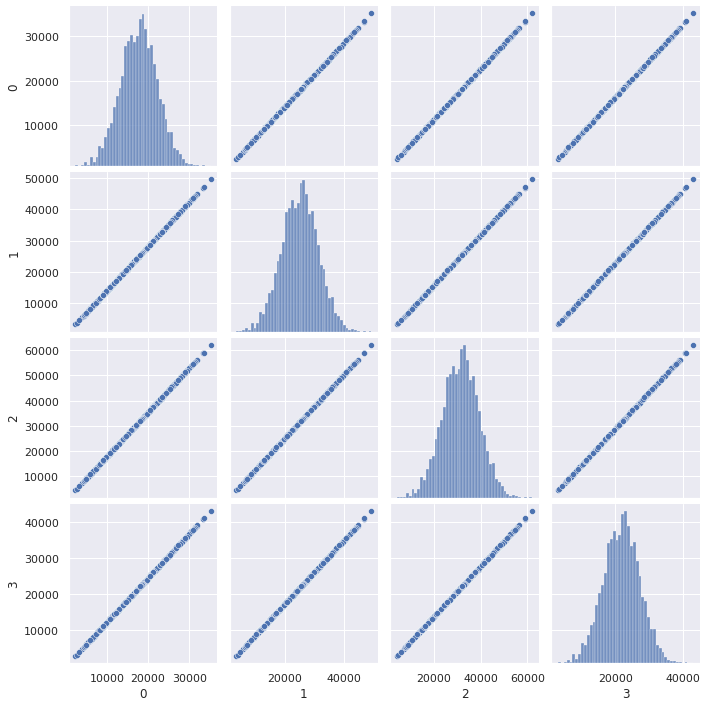

In [52]:
# display chart
sns.pairplot(df_X_trans)
plt.show()

In [53]:
# train a model with actual data
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)

eval_regressor(y_test, y_pred_test)

RMSE: 0.23
R2: 0.66


In [54]:
# train a model with obfuscated data
lr_trans = LinearRegression()

lr_trans.fit(Xt_train, y_train)

yt_pred_train = lr_trans.predict(Xt_train)
yt_pred_test = lr_trans.predict(Xt_test)

eval_regressor(y_test, yt_pred_test)

RMSE: 0.23
R2: 0.66


- The blurred data has the same results in the **Linear Regression** model as the original data.
- The blurring data process may change the data distribution when visualized, but it still gives the same results in the learning model.

## 4. Conclusion

**1. Data Preparation**
- We start by loading a dataset with a total of **5000** rows and **5** columns.
- We rename the columns to lowercase to make it easier to analyze.
- No *missing value* is found, but there are some duplicates, and we decided to remove the duplicates.

**2. EDA and Data Visualization**
- The number of male and female *customers* is equal, and the income distribution is normal, with the average income at **40,000**.
- All insurance *customers* are aged between **18** years old and **65** years old. There are no young *customers* who receive insurance benefits. All *customers* who receive insurance benefits are above the age of **40** years.

**3. Model**
- In *objective* 1, we look for clients with similar characteristics and find that the scaled data has a smaller *distance* than the original data.
- In *objective* 2, we look for a comparison between the number of clients who receive insurance benefits and those who do not. The data shows that the number of insurance beneficiaries is much less than the number of clients who receive insurance benefits. The results of the *evaluation metric* on the model also show that the model with scaling has much better results than the model without *scaling*.
- The result of regression test on *objective* 3 shows that the result of **RMSE** on the model with *scaling* is better by **10%** than the model without *scaling*.
- We successfully performed data blurring on *objective* 4, by multiplying the numerical features. We also managed to restore the data to its original state.


**Main Conclusion**
- In the blurred data, we can see that the data has a different distribution from the original data through the results shown by some diagrams. Even though the data has a different distribution, it still shows the same results when we *train* the model.
